In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
pd.set_option('display.max_columns', None)

# 1. Missing Data Analysis: The 30 Approved Features

## 1. Objective
The primary goal of this notebook is to conduct a rigorous analysis of data completeness within the dataset. As per the project guidelines, we focus strictly on the **30 Approved Features** categorized into:
1.  **Planet Physical Properties** (e.g., Mass, Radius, Density)
2.  **Planet Orbital Parameters** (e.g., Period, Eccentricity)
3.  **Stellar Properties** (e.g., Luminosity, Metallicity)
4.  **System & Meta Data** (e.g., Distance, Detection Method)

## 2. Methodology
In this analysis, we will:
* **Isolate** the target columns from the raw dataset.
* **Quantify** the extent of missing data (Absolute counts and Percentages).
* **Visualize** the patterns of missingness to detect systemic data gaps using standard visualization libraries (Seaborn/Matplotlib).

> **Note:** This notebook is purely diagnostic. **No data imputation** (filling of missing values) is performed at this stage.

In [2]:
file_path = '/kaggle/input/phl-exoplanet-catalog/phl_exoplanet_catalog_2019.csv' 

try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

# The Approved Pool of 30 Features
target_columns = [
    # Planet Physical Properties
    "P_MASS", "P_RADIUS", "P_DENSITY", "P_GRAVITY", "P_ESCAPE", "P_TYPE",
    # Planet Orbital Parameters
    "P_PERIOD", "P_SEMI_MAJOR_AXIS", "P_ECCENTRICITY", "P_INCLINATION",
    "P_OMEGA", "P_PERIASTRON", "P_APASTRON", "P_IMPACT_PARAMETER", "P_HILL_SPHERE",
    # Stellar Properties
    "S_MASS", "S_RADIUS", "S_LUMINOSITY", "S_TEMPERATURE", "S_AGE",
    "S_METALLICITY", "S_LOG_G", "S_TYPE", "S_MAG", "S_DISC", "S_MAGNETIC_FIELD",
    # System & Meta Data
    "S_SNOW_LINE", "S_TIDAL_LOCK", "P_DETECTION", "P_DISTANCE"
]

# Check which columns actually exist in the CSV to avoid errors
existing_cols = [col for col in target_columns if col in df.columns]
missing_cols = [col for col in target_columns if col not in df.columns]

if missing_cols:
    print(f" Warning: {len(missing_cols)} target columns not found in dataset: {missing_cols}")

# Create the analysis subset
df_analysis = df[existing_cols]
print(f" Analysis subset created with {df_analysis.shape[1]} columns.")

Dataset loaded: 4048 rows, 112 columns
 Analysis subset created with 30 columns.


## 3. Quantitative Analysis
Here we calculate the exact number and percentage of missing values for each column.

In [3]:
# Calculate counts and percentages
missing_count = df_analysis.isnull().sum()
missing_percent = (df_analysis.isnull().sum() / len(df_analysis)) * 100

# Create a dataframe for presentation
missing_stats = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percent
})

# Filter: Only show columns that have missing values, sorted by percentage
missing_stats = missing_stats[missing_stats['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

# Display the table with a gradient for better readability
print(f"Columns with missing values: {len(missing_stats)}")
display(missing_stats.style.background_gradient(cmap='Reds'))

Columns with missing values: 29


,Missing Count,Missing Percentage (%)
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_GRAVITY,3342,82.559289
P_ESCAPE,3342,82.559289
P_DENSITY,3342,82.559289
P_OMEGA,3302,81.571146
P_INCLINATION,3204,79.150198
S_TYPE,2678,66.156126
P_ECCENTRICITY,2668,65.909091
P_IMPACT_PARAMETER,2639,65.192688


## 4. Visual Analysis: Extent of Missing Data
This chart visualizes the percentage of missing data per feature. It helps prioritize which columns need the most attention during the cleaning phase.

/tmp/ipykernel_55/299007080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=missing_stats.index, y=missing_stats['Missing Percentage (%)'], palette='viridis')


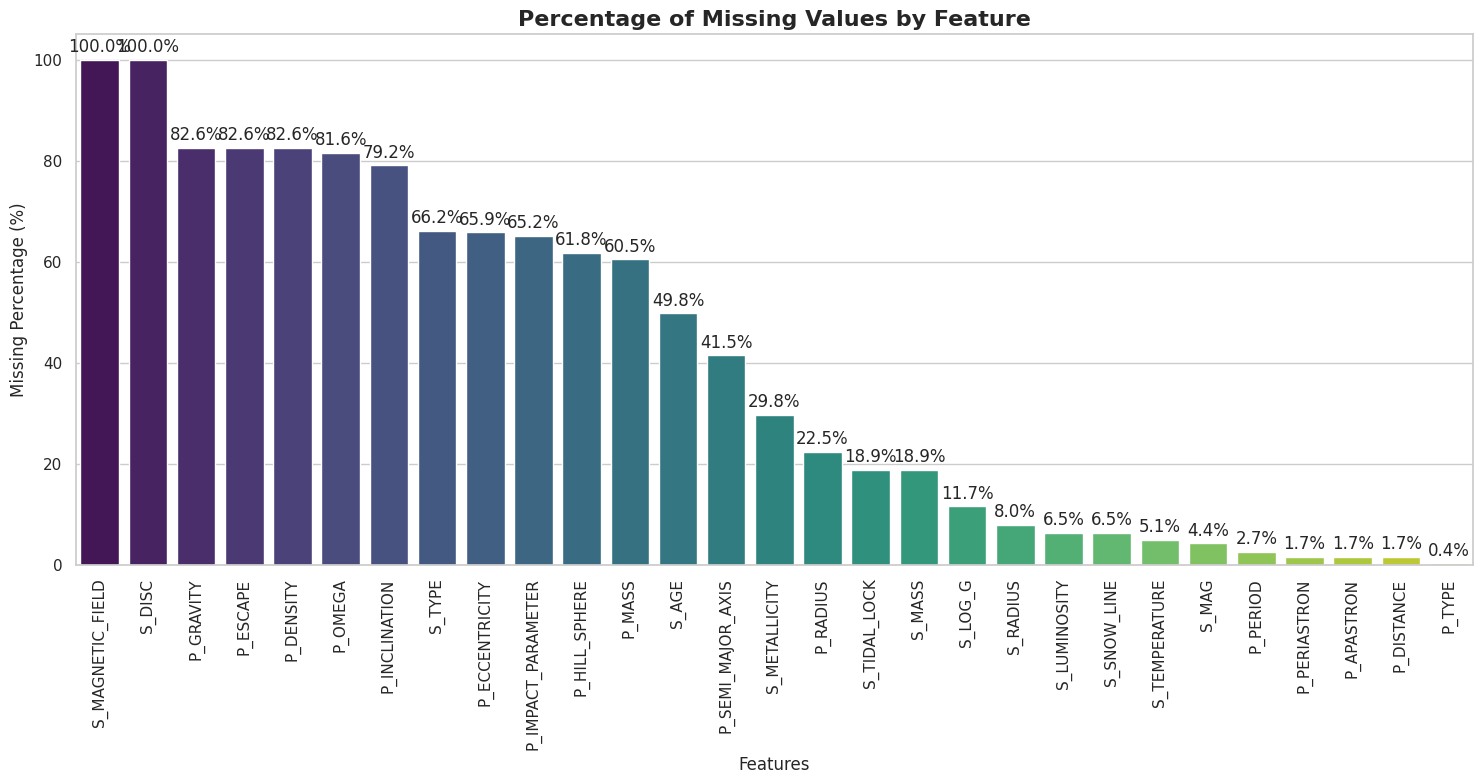

In [4]:
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x=missing_stats.index, y=missing_stats['Missing Percentage (%)'], palette='viridis')

plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature', fontsize=16, fontweight='bold')
plt.ylabel('Missing Percentage (%)', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Add percentage labels on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f') + '%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 5. Visual Analysis: Missingness Patterns
We use a **Nullity Matrix** (Heatmap) to visualize where the data is missing.
* **Yellow/Light:** Indicates missing data.
* **Purple/Dark:** Indicates present data.
* **Horizontal Bands:** If multiple columns show light bands in the same rows, the data is missing systematically for specific observations.

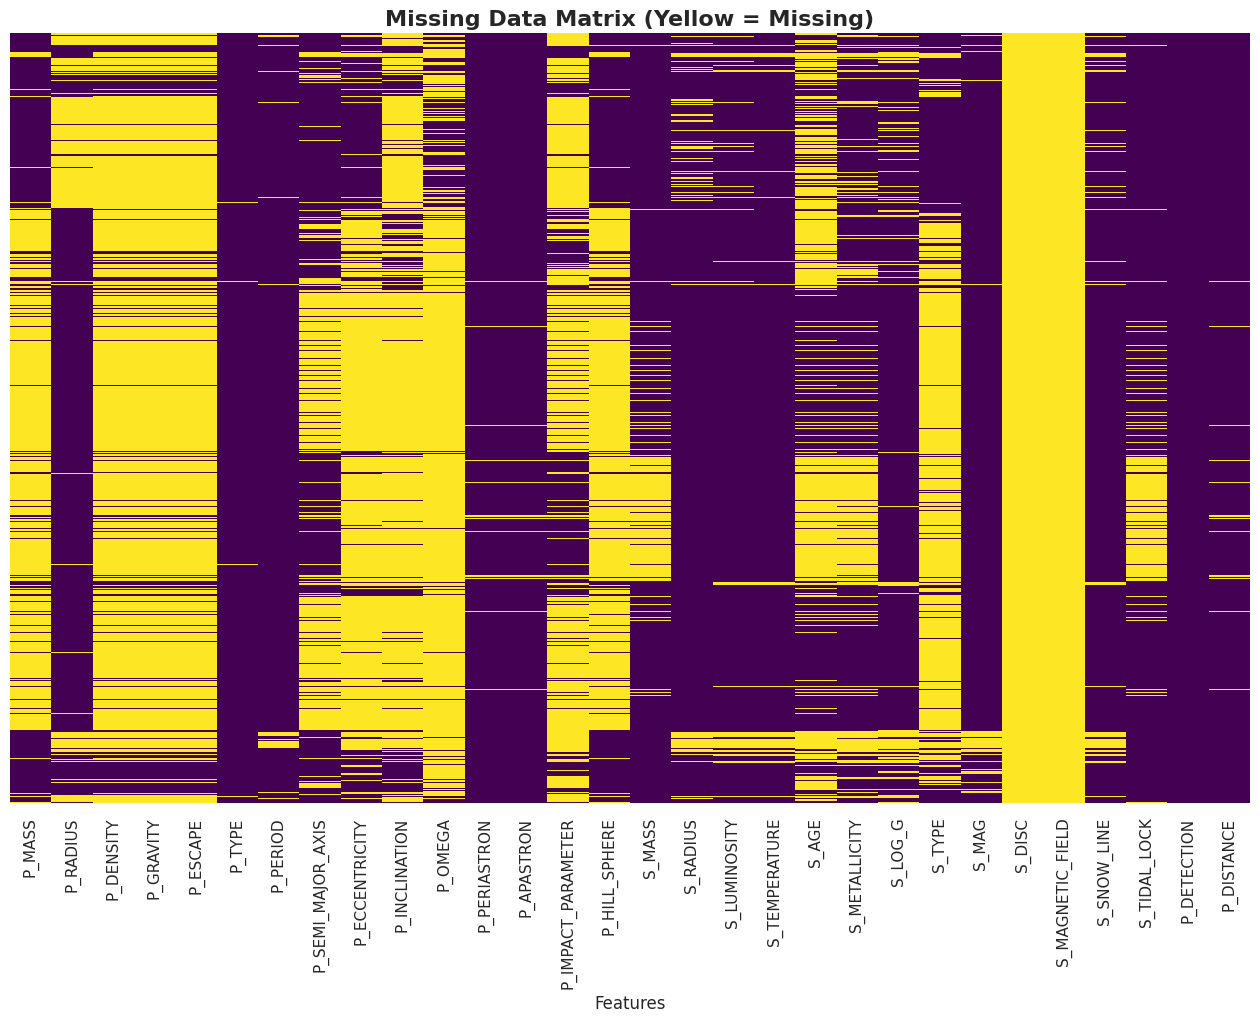

In [5]:
# Replicating missingno matrix using Seaborn
plt.figure(figsize=(16, 10))

# We plot the boolean dataframe (True=Missing, False=Present)
sns.heatmap(df_analysis.isnull(), 
            cbar=False, 
            yticklabels=False, 
            cmap='viridis')

plt.title('Missing Data Matrix (Yellow = Missing)', fontsize=16, fontweight='bold')
plt.xlabel('Features')
plt.show()

## 6. Relation Between Missing Values (Correlation)
To understand if missing values are linked, we calculate the **Nullity Correlation**.
* **High Correlation (Red):** If Feature A is missing, Feature B is also likely missing.
* **Low/No Correlation:** The missingness is random or unrelated.

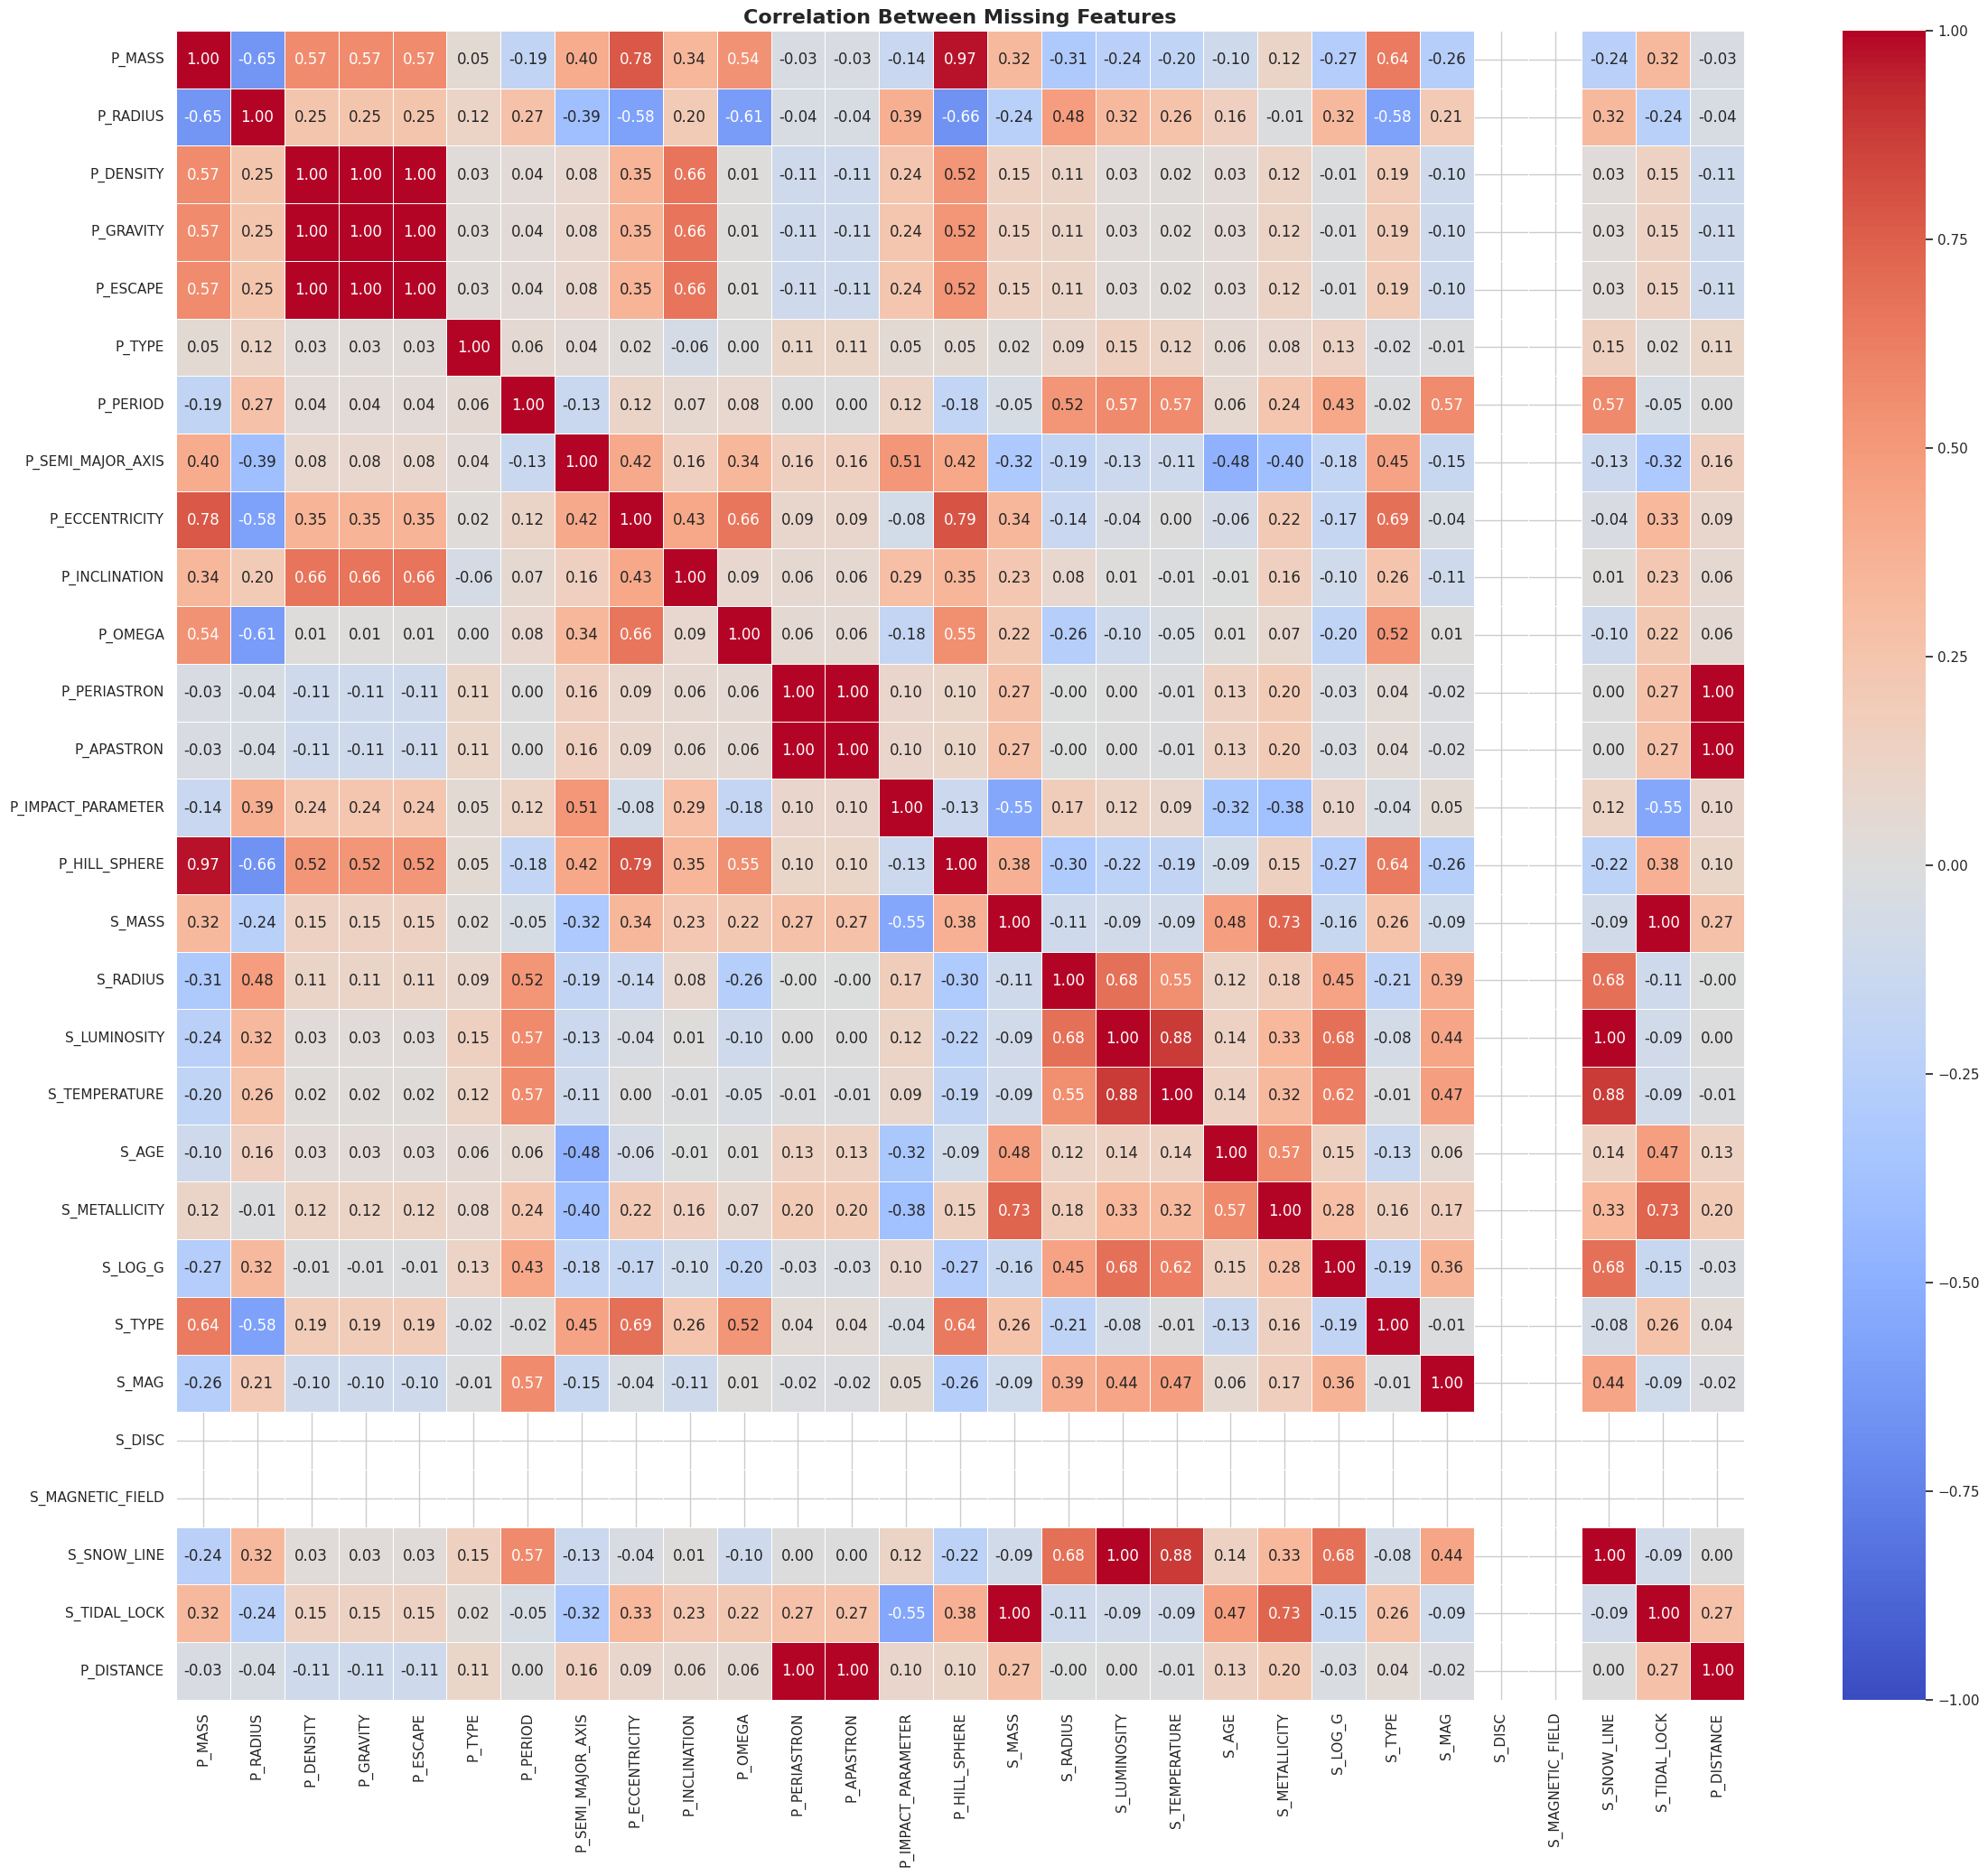

In [7]:
# Calculate correlation only for columns that have missing values
cols_with_missing = [col for col in df_analysis.columns if df_analysis[col].isnull().sum() > 0]

if len(cols_with_missing) > 1:
    plt.figure(figsize=(28, 24))
    
    # Calculate correlation of the boolean (isnull) dataframe
    null_corr = df_analysis[cols_with_missing].isnull().corr()
    
    # Plot
    sns.heatmap(null_corr, 
                cmap='coolwarm', 
                annot=True, 
                fmt='.2f', 
                vmin=-1, vmax=1, 
                linewidths=0.5)
    
    plt.title('Correlation Between Missing Features', fontsize=16, fontweight='bold')
    plt.show()
else:
    print("Not enough columns with missing data to generate a correlation map.")